## Health savings experiments

<font size="3">
To understand why the poor are constrained in their ability to save for investments in preventative health products, two researchers designed a field experiment in rural Kenya in which they randomly varied access to four innovative saving technologies. By observing the impact of these various technologies on asset accumulation, and by examining which types of people benefit most from them, the researchers were able to identify the key barriers to saving.  This exercise is based on: 

Dupas, Pascaline and Jonathan Robinson. 2013. "[Why Don't the Poor Save More? Evidence from Health Savings Experiments.](http://dx.doi.org/10.1257/aer.103.4.1138)" *American Economic Review*, Vol. 103, No. 4, pp. 1138-1171.

They worked with 113 ROSCAs (Rotating Savings and Credit Associations). A ROSCA is a group of individuals who come together and make regular cyclical contributions to a fund (called the “pot”), which is then given as a lump sum to one member in each cycle. In their experiment, Dupas and Robinson randomly assigned 113 ROSCAs to one of the five study arms. In this exercise, we will focus on three study arms (one control and two treatment arms). The data file, `rosca.csv` is extracted from their original data, excluding individuals who have received multiple treatments for the sake of simplicity.

Individuals in all study arms were encouraged to save for health and were asked to set a health goal for themselves at the beginning of the study.  In the first treatment group (*Safe Box*), respondents were given a box locked with a padlock, and the key to the padlock was provided to the participants. They were asked to record what health product they were saving for and its cost. This treatment is designed to estimate the effect of having a safe and designated storage technology for preventative health savings.  

In the second treatment group (*Locked Box*), respondents were given a locked box, but not the key to the padlock. The respondents were instructed to call the program officer once they had reached their saving goal, and the program officer would then meet the participant and open the *Locked Box* at the shop where the product is purchased. Compared to the safe box, the locked box offered stronger commitment through earmarking (the money saved could only be used for the prespecified purpose). 

Participants are interviewed again 6 months and 12 months later. In this exercise, our outcome of interest is the amount (in Kenyan shilling) spent on preventative health products after 12 months.

Descriptions of the relevant variables in the data file `rosca.csv` are:
</font> 

--------------------------------------------------------------------------------------------
 Name                             Description
 -------------------------------- ----------------------------------------------------------
 `bg_female`                      `1` if female, and `0` otherwise
 
 `bg_married`                     `1` if married, and `0` otherwise
 
 `bg_b1_age`                      age at baseline
 
 `encouragement`                  `1` if encouragement only (control group), and `0` otherwise 
 
 `safe_box`                       `1` if safe box treatment, and `0` otherwise
 
 `locked_box`                     `1` if lock box treatment, and `0` otherwise
 
 `fol2_amtinvest`                 Amount invested in health products         
 
 `has_followup2`                  `1` if appears in 2nd followup (after 12 months), and `0` otherwise
--------------------------------------------------------------------------------------------


First, we need to load the data in R. The data is in the form of a csv file. We can use the following code to read the data.

In [8]:
rosca <-  read_csv('./data/rosca.csv')



Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  bg_female = col_double(),
  bg_married = col_double(),
  bg_b1_age = col_double(),
  encouragement = col_double(),
  safe_box = col_double(),
  locked_box = col_double(),
  fol2_amtinvest = col_double(),
  has_followup2 = col_double()
)



In the `read.csv` function above, you need  to enter the diretory of the data file on your own computor. For MAC users, you can drag the file to the terminal to get the directory; for Windows users, go to the folder that contains the file,click at the end of the box that has the directory like "user> name> xxx> xxxx>". This highlights the full path to the folder.

We need to make some changes to  have the data ready for plots

In [9]:
rosca$treatment <- NA
rosca$treatment[rosca$encouragement == 1] <- "control"
rosca$treatment[rosca$safe_box == 1] <- "safebox"
rosca$treatment[rosca$locked_box == 1] <- "lockbox"
rosca$treatment <- as.factor(rosca$treatment)
rosca <-  rosca[rosca$has_followup2 == 1, ]
rosca$bg_female <-  factor(rosca$bg_female )
rosca$bg_married <-  factor(rosca$bg_married)

summary(rosca)


       X1        bg_female bg_married   bg_b1_age     encouragement   
 Min.   :  1.0   0: 99     0: 99      Min.   :18.00   Min.   :0.0000  
 1st Qu.:107.0   1:294     1:294      1st Qu.:30.00   1st Qu.:0.0000  
 Median :210.0                        Median :38.00   Median :0.0000  
 Mean   :212.8                        Mean   :39.89   Mean   :0.2595  
 3rd Qu.:318.0                        3rd Qu.:48.00   3rd Qu.:1.0000  
 Max.   :423.0                        Max.   :88.00   Max.   :1.0000  
    safe_box        locked_box     fol2_amtinvest   has_followup2   treatment  
 Min.   :0.0000   Min.   :0.0000   Min.   :   0.0   Min.   :1     control:102  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:  40.0   1st Qu.:1     lockbox:184  
 Median :0.0000   Median :0.0000   Median : 100.0   Median :1     safebox:107  
 Mean   :0.2723   Mean   :0.4682   Mean   : 322.2   Mean   :1                  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.: 490.0   3rd Qu.:1                  
 Max.   :1.0000   Max. 

In the above code, we create a variable to indicate the treatment and subset the data so that it contains only participants who were interviewed in 12 months during the second followup.



# Analyzing the data

We will use our data visualization techniques to do an analysis for this dataset step by step.

You may find that some tasks require something you have not learned before. This happens a lot when you are doing a real data analysis. Use the help page, google, stackoverflow, etc. to find out a solution. In some sense, this is the key ability you need to acquire from the course.

## Task 1
How many obervations and variables are in the data. What are the meanings of `bg_female`, `bg_married`, `treatment`,`fol2_amtinvest`? Get some summary statistics of these variables.


## Task 2

Draw two bar charts to show the number and the proportion of individuals under each of the three treatment conditions. 
```r
ggplot(data = rosca)+
  geom_bar(mapping = aes(x=treatment))
```

```r
ggplot(data = rosca)+
  geom_bar(mapping = aes(x=treatment,y=..prop.., group=1))
```

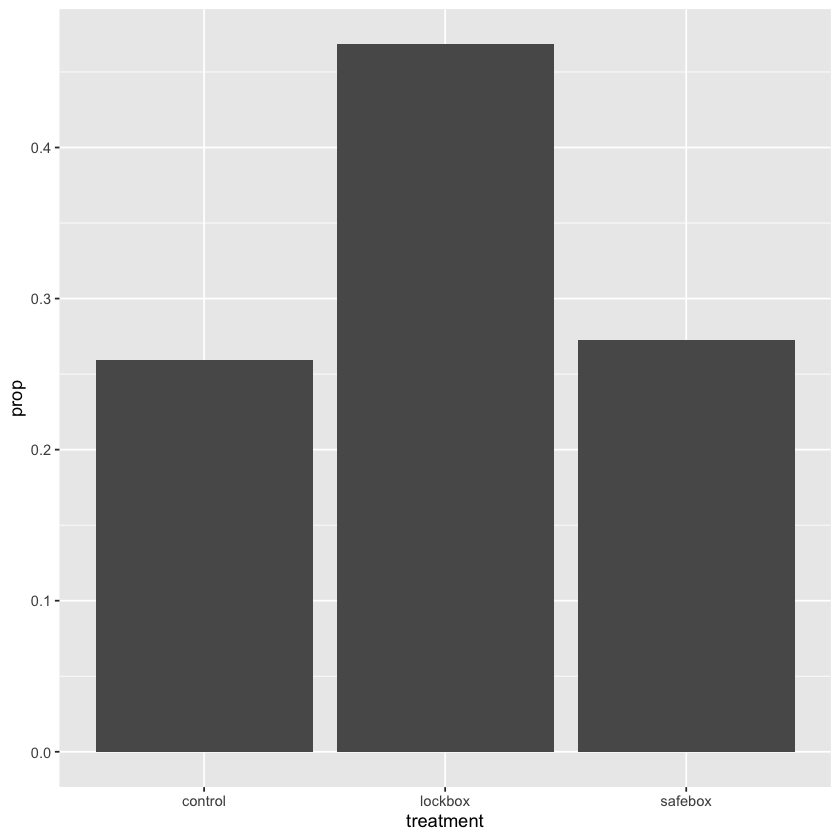

In [11]:
ggplot(data = rosca)+
  geom_bar(mapping = aes(x=treatment,y=..prop.., group=1))

## Task 3

Use a bar chart to show the gender distribution  within each treatment condition

* use `fill` aesthetic to separate the gender within each bar. Try different position adjustment. Which treatment condition has the highest female proportion?
```r
rosca.bar <-  ggplot(data = rosca)+
  geom_bar(mapping = aes(x=treatment,fill = bg_female),position = 'fill')
rosca.bar
```

* add a  title  for the graph and remove the labels of `x`-axis `y`-axis
```r
rosca.bar + labs(title = "Gender distribution",x=NULL, y=NULL)
```

* How to center the title? A naive way is to mannualy add spaces. Try to use google to find a solution.
```r
rosca.bar + labs(title = "Gender distribution",x=NULL, y=NULL)+
  theme(plot.title = element_text(hjust = 0.5))
```

Themes are a powerful way to customize the non-data components of your plots: i.e. titles, labels, fonts, background, gridlines, and legends. Themes can be used to give plots a consistent customized look.
Can you use the theme to make the title in bold? 
```r
rosca.bar + labs(title = 'Gender distribution',x=NULL, y=NULL)+
  theme(plot.title = element_text(hjust = 0.5,face ='bold'))
```




- We can do one more thing to improve the graph. The legends are not intuitive enough. We can change the legend title to `gender` and the labels to `male` and `female`. Use google to find a solution. (You could search "change legend title in ggplot" and "rename legend labels in ggplot")


There are multiple ways to do this. Let's use the `scale_aesthetic_manual()` function. The new legend labels are supplied as a character vector to the labels argument. If you want to change the color of the categories, it can be assigned to the `values` argument. Because the legend is created by `fill`. We can use `scale_aesthetic_manual()`
```r
rosca.bar + labs(title = 'Gender distribution',x=NULL, y=NULL)+
  theme(plot.title = element_text(hjust = 0.5,face ='bold'))+
  scale_fill_manual(name='gender',labels=c('male','female'),values=c('0'='red','1'='blue'))
```

Another way to do this is to change the name and levels of the `bg_female` variable in the orginal data.
```r
rosca2 <- rosca
colnames(rosca2)[2] <- "gender"
levels(rosca2$gender) <- c('male','female')
ggplot(data = rosca2)+
  geom_bar(mapping = aes(x=treatment,fill = gender),position = 'dodge')+
  labs(title = 'Gender distribution',x=NULL, y=NULL)+
  theme(plot.title = element_text(hjust = 0.5,face ='bold'))
```

## Task 4
Try a similar analysis using  the `bg_married` variable

##  Task 5
Does receiving a safe box or lockbox increase the amount invested in health products? We focus on the outcome measured 12 months from baseline during the second follow-up `fol2_amtinvest`. Use boxplot to summarize the `y` values for each treatment condition.
```r
ggplot(data = rosca) + 
  geom_boxplot(
    mapping = aes(x = treatment, y = fol2_amtinvest)
  )
```

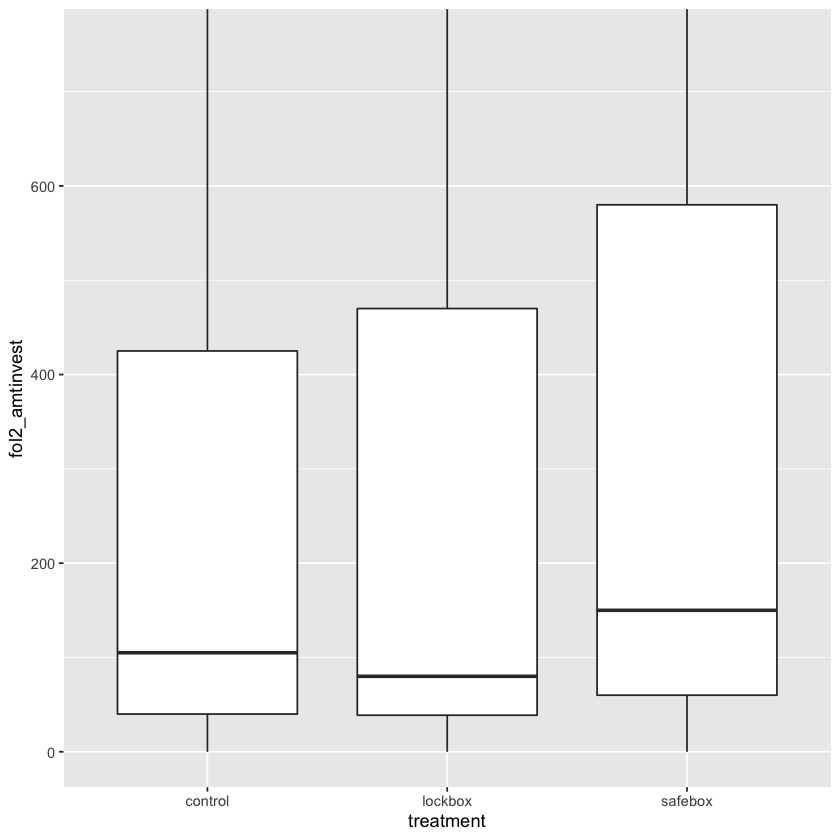

In this graph, there are some extreme values which make it hard to compare the different treatment conditions. Zoom in to make the three boxplots easier for comparison.

```r
ggplot(data = rosca) + 
  geom_boxplot(
    mapping = aes(x = treatment, y = fol2_amtinvest)
  )+
  coord_cartesian(ylim=c(0,750))
```

* Are the results similar for different groups of people (e.g., married versus unmarried, male versus female)? Use faceted graphs to get the answer.
```r
ggplot(data = rosca) + 
  geom_boxplot(mapping = aes(x = treatment, y = fol2_amtinvest))+
  labs(x=NULL,y= 'Investment')+
  coord_cartesian(ylim=c(0,1000))+
  facet_grid(bg_female~bg_married)
```

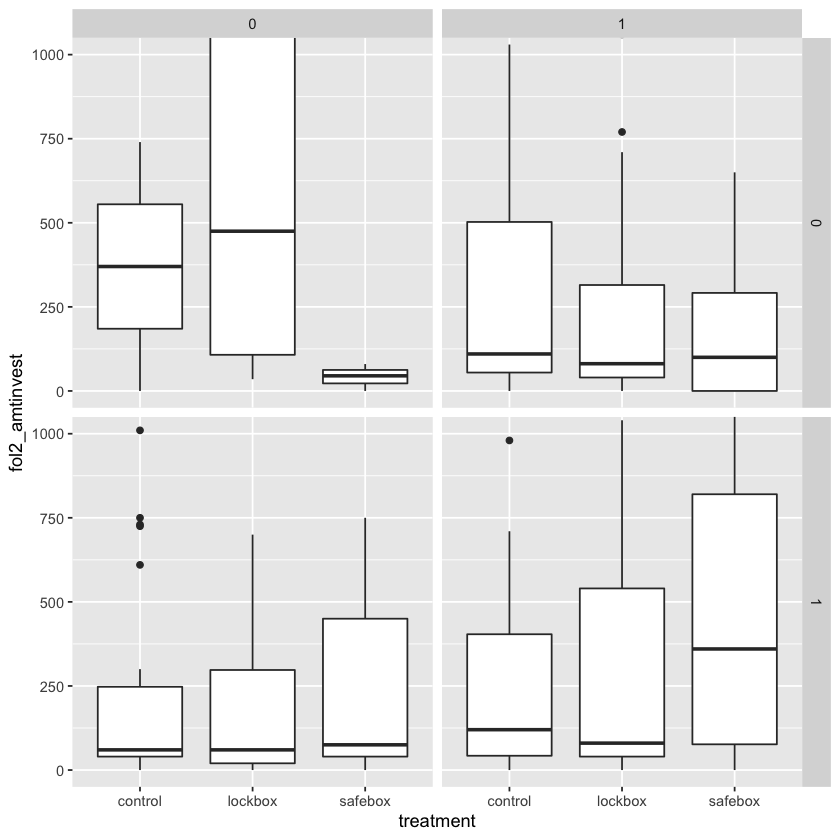

The problem of this graph is the labels for facets are not clear. Google how to change  the labels in `facet_grid`

```r
name_female <-  c('0'= 'male', '1' = 'female' )
name_married <-  c('0'= 'unmarried', '1' = 'married' )

ggplot(data = rosca) + 
  geom_boxplot(
    mapping = aes(x = treatment, y = fol2_amtinvest)
  )+
  labs(x=NULL,y= 'Investment')+
  coord_cartesian(ylim=c(0,1000))+
  facet_grid(bg_female ~ bg_married,
             labeller = labeller(bg_female= name_female, bg_married=name_married) )
```


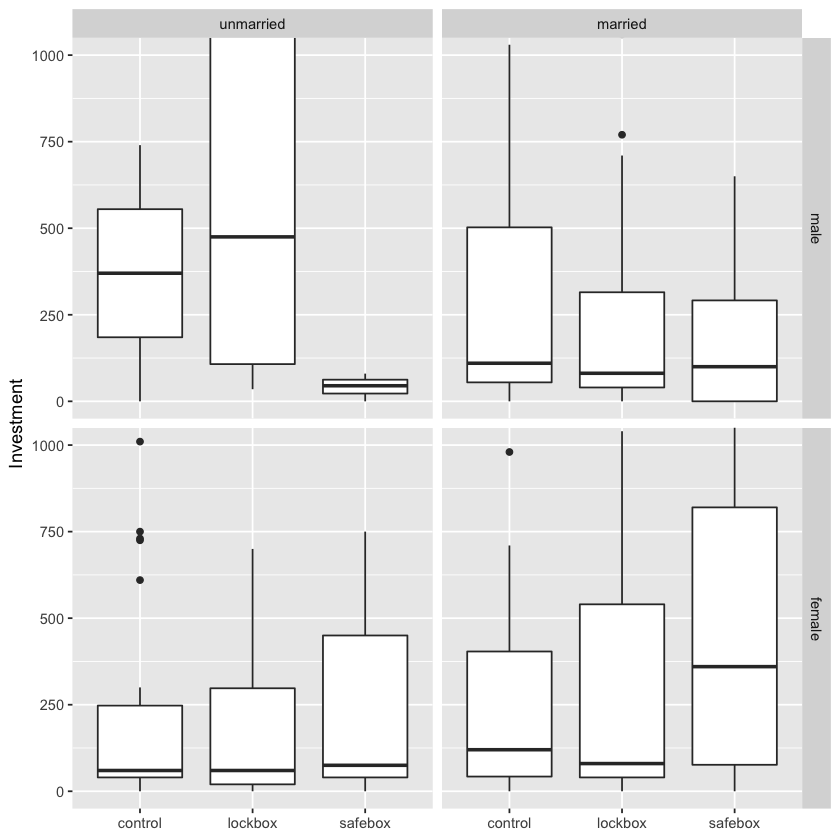

In [34]:
name_female <-  c('0'= 'male', '1' = 'female' )
name_married <-  c('0'= 'unmarried', '1' = 'married' )

ggplot(data = rosca) + 
  geom_boxplot(
    mapping = aes(x = treatment, y = fol2_amtinvest)
  )+
  labs(x=NULL,y= 'Investment')+
  coord_cartesian(ylim=c(0,1000))+
  facet_grid(bg_female ~ bg_married,
             labeller = labeller(bg_female= name_female, bg_married=name_married) )

## Task 6
* What is the relationship between age and  the amount of investment in hospital products？Use `geom_smooth` to show the relationship between `age` and `fol2_amtinvest` for each of the three treatment groups.
```{r}
ggplot(data = rosca,mapping = aes(x=bg_b1_age, y = fol2_amtinvest))+
  geom_point()+
  geom_smooth()+
  labs(x='age',y='investment')+
  scale_y_continuous(limits =c(0,2000))+
  facet_wrap(~treatment)
```

The fitted lines are problematic because of too many zeros.  Need to use other statistical methods to fit the lines.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_smooth).”


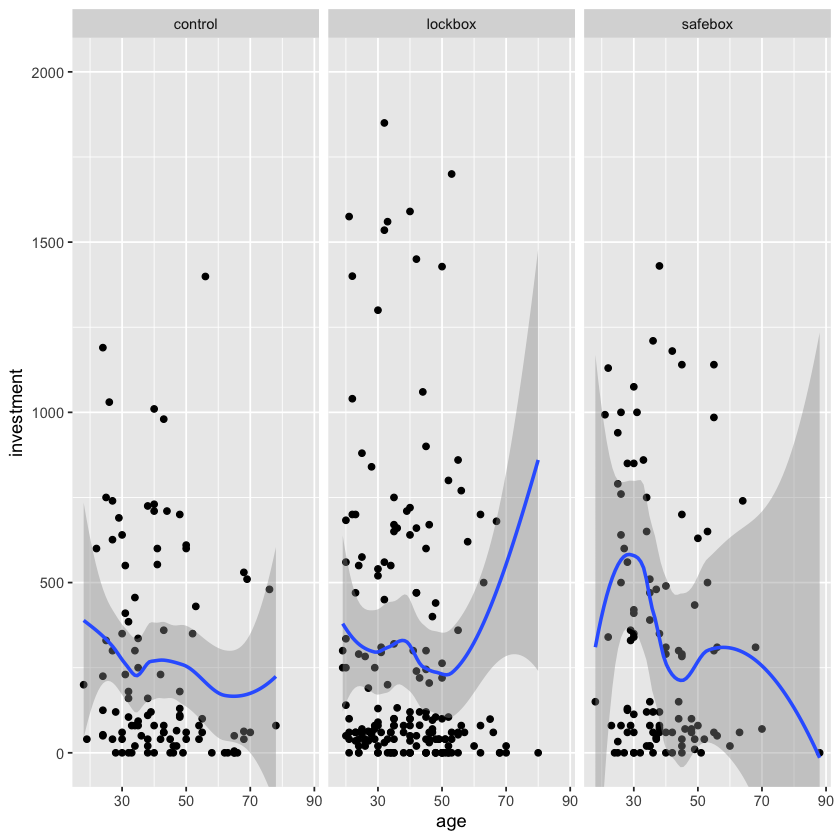

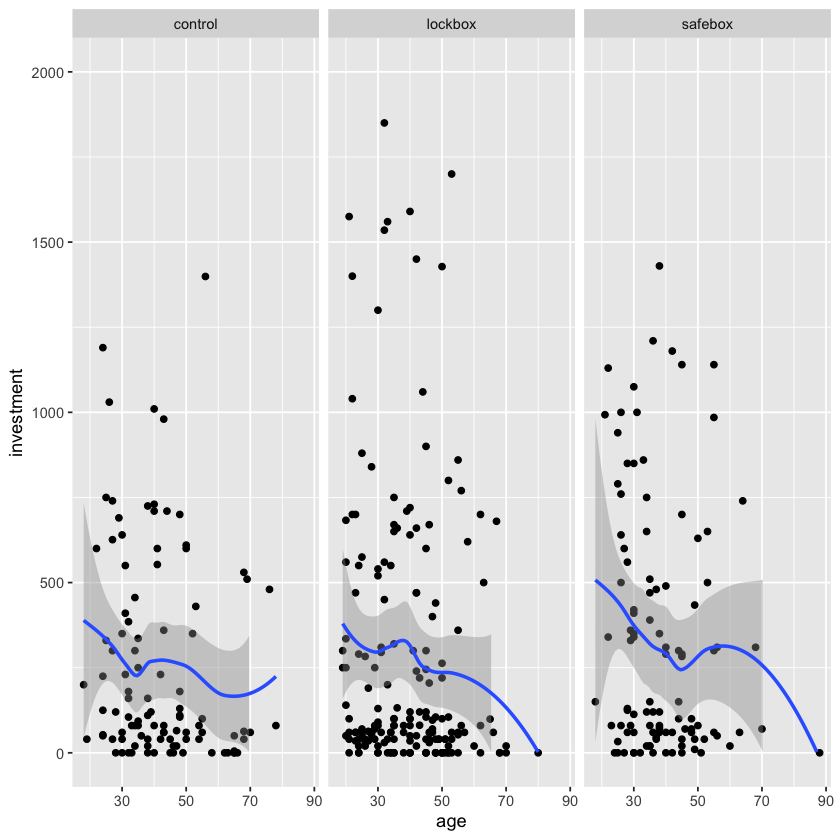

In [40]:
ggplot(data = rosca, mapping = aes(x = bg_b1_age, y = fol2_amtinvest))+
    geom_point()+
    geom_smooth()+
    coord_cartesian(ylim=c(0,2000))+
    labs(x='age',y='investment')+
    facet_wrap(~treatment)


ggplot(data = rosca, mapping = aes(x = bg_b1_age, y = fol2_amtinvest))+
    geom_point()+
    geom_smooth()+
    scale_y_continuous(limits=c(0,2000))+
    labs(x='age',y='investment')+
    facet_wrap(~treatment)

* Compare setting the limits of the y-axis using `scale_y_continuous` and `coord_cartesian`
```r
ggplot(data = rosca,mapping = aes(x=bg_b1_age, y = fol2_amtinvest))+
  geom_point()+
  geom_smooth()+
  labs(x='age',y='investment')+
  coord_cartesian(ylim =c(0,2000))+
  facet_wrap(~treatment)
```

